In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.actor_critic import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import gym
import matplotlib.pyplot as plt
import torch

In [2]:
norm_cols = ['open', 'high', 'low', 'close', f'Volume XRP']
cols = ['date'] + norm_cols
batch_dur = 30
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-05-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
../environment.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
../environment.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [3]:
actor_model = Actor(
    state_dim=batch_dur*3+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*3+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.001),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.001),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=25,
)

In [4]:
a2c.run(5000)


Ep: 0 | L: 0.331 | R: 97787.7 | R.Avg.R: 97787.7 | P: 201 | R.Avg P: 201 | B: 164 | R.Avg B: 164 | R.N_Units: 13347
Ep: 25 | L: 0.021 | R: 821.11 | R.Avg.R: 30414.85 | P: 1 | R.Avg P: 63 | B: 60 | R.Avg B: 85 | R.N_Units: 8519
Ep: 50 | L: 0.178 | R: 60122.89 | R.Avg.R: 49523.6 | P: 123 | R.Avg P: 81 | B: 114 | R.Avg B: 95 | R.N_Units: 9352
Ep: 75 | L: 0.151 | R: 61713.57 | R.Avg.R: 37613.53 | P: 127 | R.Avg P: 90 | B: 110 | R.Avg B: 99 | R.N_Units: 9719
Ep: 100 | L: 0.087 | R: 38564.25 | R.Avg.R: 49688.44 | P: 79 | R.Avg P: 89 | B: 94 | R.Avg B: 96 | R.N_Units: 9902
Ep: 125 | L: 0.047 | R: 18248.41 | R.Avg.R: 46251.43 | P: 37 | R.Avg P: 97 | B: 70 | R.Avg B: 98 | R.N_Units: 10675
Ep: 150 | L: 0.028 | R: 40071.47 | R.Avg.R: 45976.83 | P: 82 | R.Avg P: 94 | B: 88 | R.Avg B: 95 | R.N_Units: 10654
Ep: 175 | L: 0.1 | R: 73396.87 | R.Avg.R: 46155.54 | P: 151 | R.Avg P: 95 | B: 120 | R.Avg B: 98 | R.N_Units: 10474
Ep: 200 | L: 0.064 | R: 59518.24 | R.Avg.R: 39429.49 | P: 122 | R.Avg P: 88 | 

## Visualizations

### Traning 

Text(0.5, 1.0, 'Rolling avg balance per episode')

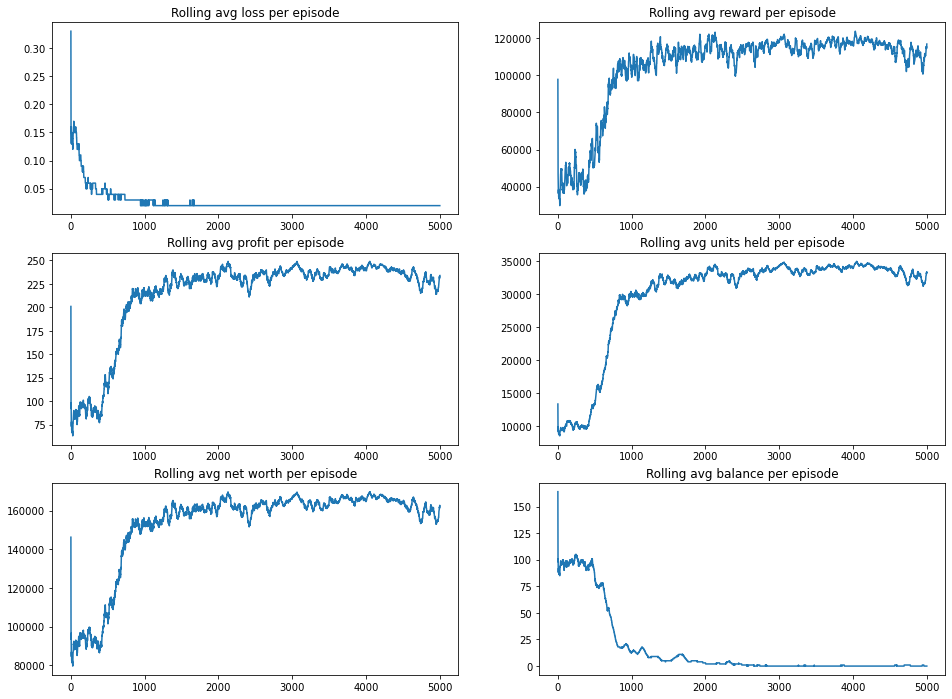

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')